# Wind Tunnel Spatial Uniformity Check

This notebook generates plots to check the spatial uniformity of the wind tunnel flow using data collected by a Constant Temperature Anemometer (CTA). The plots show the mean velocity in the streamwise direction and turbulence intensity at various spatial coordinates relative to a reference origin (308.5 mm). The data is read from CSV files, processed, and visualized for comparison between different experimental conditions.

## Key Functions:
- **read_velocity_data**: Reads the mean velocity and turbulence intensity from summary CSV files.
- **nondimensionalize**: Normalizes the velocity data by dividing it by the average velocity.

## Outputs:
- **Mean velocity plot**: Shows the mean streamwise velocity across different positions.
- **Turbulence intensity plot**: Displays the turbulence intensity across different spatial positions.
- **Nondimensionalized velocity plot**: Plots the velocity normalized by the average velocity.


In [3]:
import os
import matplotlib.pyplot as plt
import itertools

In [4]:
# Set font settings for plots
plt.rcParams["font.family"] = "Times New Roman"  # Set font family
plt.rcParams["mathtext.fontset"] = "stix"  # Set LaTeX math font

# Define the reference origin (308.5mm)
origin = 308.5


# Function to read velocity data, including turbulence intensity, from CSV files
def read_velocity_data(folder_path):
    coordinates = []  # List to store coordinates
    u_mean_velocities = []  # List to store mean velocities
    u_turbulence_intensities = []  # List to store turbulence intensities

    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith("_summary.csv"):
            # Extract the coordinate from the filename (e.g., data20.00_summary.csv -> 20.00mm)
            coordinate = float(filename.split("data")[1].split("_")[0])
            # Adjust the coordinate relative to the origin (308.5mm)
            relative_coordinate = coordinate - origin
            coordinates.append(relative_coordinate)

            # Read the CSV file
            file_path = os.path.join(folder_path, filename)
            with open(file_path, "r") as file:
                lines = file.readlines()

                # Look for the line containing U direction mean velocity and turbulence intensity
                for line in lines:
                    if line.startswith("U"):
                        # Split the line by commas, 2nd is mean velocity, 6th is turbulence intensity
                        data = line.split(",")
                        u_mean_velocity = float(data[1])
                        u_turbulence_intensity = float(
                            data[5]
                        )  # 6th element is turbulence intensity
                        u_mean_velocities.append(u_mean_velocity)
                        u_turbulence_intensities.append(u_turbulence_intensity)
                        break

    # Sort the data based on coordinates
    sorted_data = sorted(zip(coordinates, u_mean_velocities, u_turbulence_intensities))
    coordinates, u_mean_velocities, u_turbulence_intensities = zip(*sorted_data)

    return coordinates, u_mean_velocities, u_turbulence_intensities


# Function to save the plot as PNG and PDF
def save_plot(figure_name, save_dir="./", dpi=500):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    plt.savefig(
        os.path.join(save_dir, f"figure/{figure_name}.png"),
        format="png",
        dpi=dpi,
        bbox_inches="tight",
        pad_inches=0,
    )
    plt.savefig(
        os.path.join(save_dir, f"figure/{figure_name}.pdf"),
        format="pdf",
        dpi=dpi,
        bbox_inches="tight",
        pad_inches=0,
    )


In [5]:
# List of folders to compare (up to 10 folders)
folders = [
    "X_10Hz_30s",
    # "X_20Hz_30s",
    # "X_30Hz_30s",
]

# List of colors and markers for plotting (up to 10 combinations)
colors = ["k", "b", "r", "g", "c", "m", "y", "k", "purple", "orange", "brown"]
markers = ["o", "s", "D", "^", "v", "<", ">", "p", "*", "h"]

# Cycle through color and marker combinations
color_marker_combinations = itertools.cycle(zip(colors, markers))

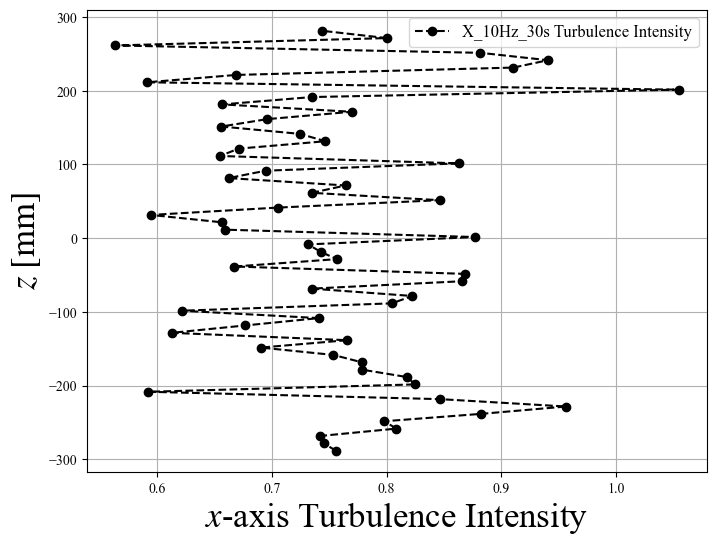

<Figure size 640x480 with 0 Axes>

In [6]:
# Plot turbulence intensity
plt.figure(figsize=(8, 6))

# Loop through folders and plot turbulence intensity
for folder in folders:
    coordinates, u_mean_velocities, u_turbulence_intensities = read_velocity_data(
        f"data/{folder}"
    )

    # Get color and marker for each folder
    color, marker = next(color_marker_combinations)

    # Plot turbulence intensity vs. coordinates
    plt.plot(
        u_turbulence_intensities,
        coordinates,
        marker=marker,
        linestyle="--",
        color=color,
        label=f"{folder} Turbulence Intensity",
    )

# Set labels and title for turbulence intensity plot
plt.xlabel(r"$x$-axis Turbulence Intensity", fontsize=25)
plt.ylabel(r"$z~\rm{[mm]}$", fontsize=25)

# Enable grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Save the plot
figure_name = folder if len(folders) == 1 else "compare"
save_plot(f"TurbulenceIntensity_{figure_name}")

# Show the plot and clear
plt.show()
plt.clf()

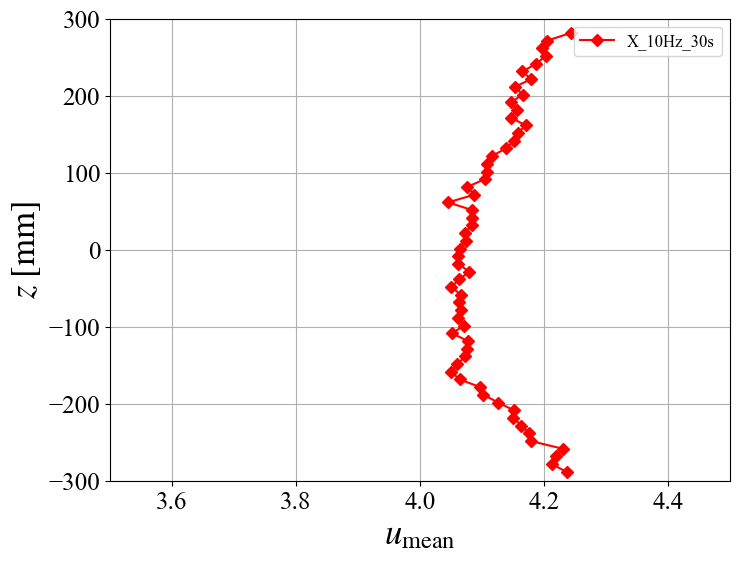

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot mean velocity
plt.figure(figsize=(8, 6))

# Loop through folders and plot mean velocity
for folder in folders:
    coordinates, u_mean_velocities, u_turbulence_intensities = read_velocity_data(
        f"data/{folder}"
    )
    color, marker = next(color_marker_combinations)
    plt.plot(
        u_mean_velocities,
        coordinates,
        marker=marker,
        linestyle="-",
        color=color,
        label=f"{folder}",
    )

# Set labels and title for mean velocity plot
plt.xlabel(r"$u_{ \rm{mean}}$", fontsize=25)
plt.ylabel(r"$z~\rm{[mm]}$", fontsize=25)
plt.tick_params(labelsize=18)

# Enable grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Set axis limits for mean velocity plot
plt.ylim([-300, 300])
plt.xlim([3.5, 4.5])

# Save the plot
figure_name = folder if len(folders) == 1 else "compare"
save_plot(f"MeanVelocity_{figure_name}")

# Show the plot and clear
plt.show()
plt.clf()

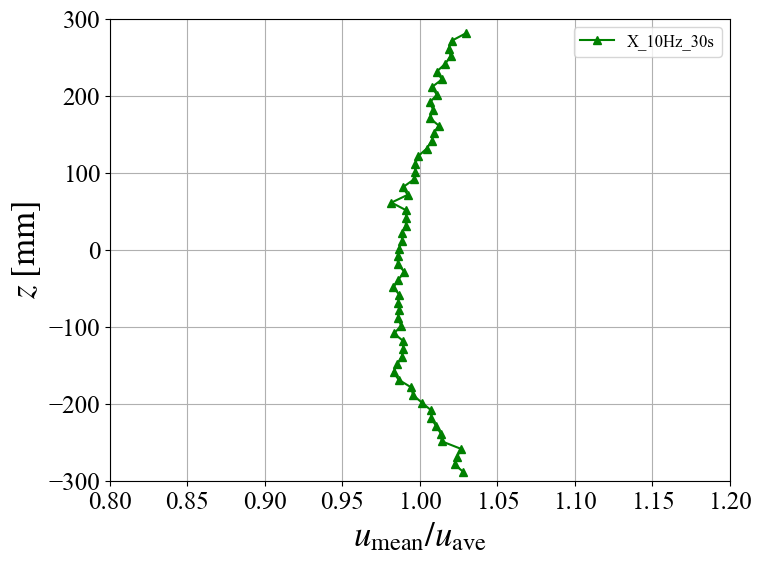

<Figure size 640x480 with 0 Axes>

In [11]:
# Function to nondimensionalize velocity by dividing by the average velocity
def nondimensionalize(u_mean_velocities):
    # Calculate the average velocity
    avg_velocity = sum(u_mean_velocities) / len(u_mean_velocities)
    # Nondimensionalize each velocity by dividing by the average velocity
    return [u / avg_velocity for u in u_mean_velocities], avg_velocity


# Plot nondimensionalized velocity
plt.figure(figsize=(8, 6))

# Loop through folders and plot nondimensionalized velocity
for folder in folders:
    coordinates, u_mean_velocities, u_turbulence_intensities = read_velocity_data(
        f"data/{folder}"
    )
    nondim_velocities, avg_velocity = nondimensionalize(u_mean_velocities)
    color, marker = next(color_marker_combinations)
    plt.plot(
        nondim_velocities,
        coordinates,
        marker=marker,
        linestyle="-",
        color=color,
        label=f"{folder}",
    )

# Set labels and title for nondimensionalized velocity plot
plt.xlabel(r"$u_{ \rm{mean}}/u_{ \rm{ave}}$", fontsize=25)
plt.ylabel(r"$z~\rm{[mm]}$", fontsize=25)
plt.tick_params(labelsize=18)

# Enable grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Set axis limits for nondimensionalized velocity plot
plt.ylim([-300, 300])
plt.xlim([0.8, 1.2])

# Save the plot
figure_name = folder if len(folders) == 1 else "time_compare_10Hz"
save_plot(f"ND_Velocity_{figure_name}")

# Show the plot and clear
plt.show()
plt.clf()